In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [3]:
train_dataset=torchvision.datasets.CIFAR10(root='./',train=True,transform=transform,download=True)

100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Extracting ./cifar-10-python.tar.gz to ./


In [4]:
test_dataset=torchvision.datasets.CIFAR10(root='./',train=False,transform=transform,download=True)

Files already downloaded and verified


In [5]:
!ls

cifar-10-batches-py  cifar-10-python.tar.gz  sample_data


In [6]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [8]:
train_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=4,shuffle=True,num_workers=2)

In [43]:
test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=4,shuffle=False,num_workers=2)

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def imshow(img):
  img=img/2+0.5
  np_img=img.numpy()
  plt.imgshow(np.transpose(np_img,(1,2,0)))

In [12]:
train_iter=iter(train_dataloader)

In [13]:
images,labels=next(train_iter)

In [14]:
labels

tensor([6, 2, 5, 0])

In [15]:
labels.shape

torch.Size([4])

In [16]:
images.shape

torch.Size([4, 3, 32, 32])

In [17]:
grid=torchvision.utils.make_grid(images)
grid_np=grid.permute(1,2,0).numpy()

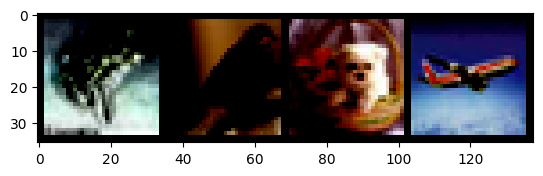

In [18]:
plt.imshow(grid_np)

In [19]:
class imageClassifierNeuralNetwork(nn.Module):
  def __init__(self):
    super(imageClassifierNeuralNetwork,self).__init__()
    self._conv_1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self._conv_2=nn.Conv2d(6,16,5)
    self.fc_1=nn.Linear(16*5*5,120)
    self.fc_2=nn.Linear(120,80)
    self.fc_3=nn.Linear(80,10)
  def forward(self,x):
    x=self.pool(F.relu(self._conv_1(x)))
    x=self.pool(F.relu(self._conv_2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc_1(x))
    x=F.relu(self.fc_2(x))
    x=self.fc_3(x)
    return x

In [20]:
ICNet=imageClassifierNeuralNetwork()

In [21]:
criterion=nn.CrossEntropyLoss()

In [22]:
optimizer=optim.SGD(ICNet.parameters(),lr=0.001,momentum=0.9)

In [24]:
for epoch in range(4):
  running_loss=0.0

  for i,train_data in enumerate(train_dataloader,0):
    input,labels=train_data

    optimizer.zero_grad()

    outputs=ICNet(input)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()


    running_loss+=loss.item()

    if  i%500==499:
      print(epoch+1,i+1,running_loss/500)
      running_loss=0.0
  print("training is finished")

1 500 1.9922136635780334
1 1000 1.9132585620880127
1 1500 1.8663564647436142
1 2000 1.816950695514679
1 2500 1.7860594111680985
1 3000 1.6810491812229156
1 3500 1.6184843651652336
1 4000 1.602911882162094
1 4500 1.5776162296533585
1 5000 1.552743132531643
1 5500 1.5279700028896332
1 6000 1.5358988089561463
1 6500 1.5320792856812477
1 7000 1.5458828622102738
1 7500 1.5001511968374253
1 8000 1.5049877749681473
1 8500 1.4828211181759834
1 9000 1.4378667437434196
1 9500 1.4900473225712776
1 10000 1.4555345704555511
1 10500 1.4683676250576974
1 11000 1.4310969144105912
1 11500 1.419126703083515
1 12000 1.444730701804161
1 12500 1.4300451480150222
training is finished
2 500 1.3683756249547006
2 1000 1.4170179876685143
2 1500 1.374082913517952
2 2000 1.3542057241797447
2 2500 1.320179567873478
2 3000 1.3594695042967797
2 3500 1.3520138542056084
2 4000 1.3555708503872157
2 4500 1.3766375924944878
2 5000 1.3486781574189664
2 5500 1.3284743447303773
2 6000 1.3418390491604806
2 6500 1.36058407610

In [25]:
train_iter=iter(train_dataloader)

In [27]:
images,labels=next(train_iter)

In [28]:
labels.shape

torch.Size([4])

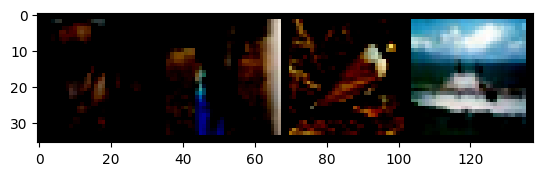

In [34]:
grid=torchvision.utils.make_grid(images)
grid_np=grid.permute(1,2,0).numpy()
plt.imshow(grid_np)

In [35]:
print(' '.join(classes[labels[i]] for i in range(4)))

dog bird bird ship


In [36]:
outputs=ICNet(images)

In [37]:
outputs

tensor([[-2.7043, -1.7346,  0.5548,  2.3667,  1.2555,  1.7460,  1.9893, -1.0450,
         -1.9416, -1.2445],
        [-0.8270, -3.0115,  1.7747,  1.9973,  1.2775,  1.9711, -1.0364, -0.0784,
         -1.3506, -2.5051],
        [-3.2664,  0.3370,  1.6518,  0.9847,  0.1013,  0.2906,  4.0312,  0.0638,
         -3.9673,  0.1985],
        [ 3.2111,  0.9036, -0.9753, -0.9761, -0.9248, -2.9828, -2.5975, -4.6279,
          8.7194,  0.2258]], grad_fn=<AddmmBackward0>)

In [38]:
outputs.shape

torch.Size([4, 10])

In [39]:
_,predicted_output=torch.max(outputs,1)

In [40]:
print(' '.join(classes[predicted_output[i]] for i in range(4)))

cat cat frog ship


In [44]:
correct=0
total=0

with torch.no_grad():
  for test_data in test_dataloader:
    test_images,test_labels=test_data
    test_predictions=ICNet(test_images)
    _,predictions=torch.max(test_predictions,1)
    total+=test_labels.size(0)
    correct+=(predictions==test_labels).sum().item()

  accuracy=100*correct/total

In [45]:
accuracy

58.89